In [30]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

import os
import random
import matplotlib.pyplot as plt

# initialize parameters
EPOCHS = 20
IMAGE_SIZE = (28, 28)
CHANNELS = 1
CLASSES = 10
TRAIN = 'mnist_train.csv'
TEST = 'mnist_test.csv'
# TRAIN_FOLDER = 'train'
# TEST_FOLDER = 'test1'

In [31]:
# filenames = os.listdir(TRAIN_FOLDER)

# train_set = {}

# # load images and labels

# for file in filenames:
#     if file[:3] == 'cat':
#         train_set[file] = 'cat'
#     else:
#         train_set[file] = 'dog'

# train_set = pd.DataFrame(train_set.items(), columns=['filename', 'label'])
# print(train_set.sample(frac=1).head())
x_train, y_train = load_data()[0]
x_test, y_test = load_data()[1]

# rescale to [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# fix dimensions
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)



print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# change data to categorical
y_train = to_categorical(y_train, CLASSES)
y_test = to_categorical(y_test, CLASSES)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

# Build CNN

cnn = Sequential()

# Convolution + Pooling

cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], CHANNELS)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(128, (3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening

cnn.add(Flatten())

# NN

cnn.add(Dense(512, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

cnn.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 128)       

In [33]:
# from sklearn.model_selection import train_test_split

# split data into train and test sets
# train, validate = train_test_split(train_set, test_size=0.20, random_state=42)
# train = train.reset_index(drop=True)
# validate = validate.reset_index(drop=True)

In [34]:
# # create generators to transform and load images
# rescale = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=15,
#     shear_range=0.1,
#     zoom_range=0.2,
#     # horizontal_flip=True,
#     width_shift_range=0.1,
#     height_shift_range=0.1
# )

# # generator = rescale.flow_from_dataframe(
# #     train, 
# #     "train/", 
# #     x_col='filename',
# #     y_col='label',
# #     target_size=IMAGE_SIZE,
# #     class_mode='categorical',
# #     batch_size=16
# # )

# validation_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = validation_datagen.flow_from_dataframe(
#     validate, 
#     "train", 
#     x_col='filename',
#     y_col='label',
#     target_size=IMAGE_SIZE,
#     class_mode='categorical',
#     batch_size=16
# )

In [35]:
# total_train = train.shape[0]
# total_validate = validate.shape[0]
batch_size = 128 # 16

# generate cnn and train

# history = cnn.fit_generator(
#     generator, 
#     epochs=EPOCHS,
#     validation_data=validation_generator,
#     validation_steps=total_validate//batch_size,
#     steps_per_epoch=total_train//batch_size,
#     callbacks=callbacks
# )
history = cnn.fit(x_train, y_train, batch_size=batch_size, epochs=EPOCHS, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 17s 39ms/step - loss: 0.3284 - accuracy: 0.8940 - val_loss: 0.0745 - val_accuracy: 0.9807
Epoch 2/20
422/422 [==============================] - 16s 38ms/step - loss: 0.0836 - accuracy: 0.9738 - val_loss: 0.0494 - val_accuracy: 0.9865
Epoch 3/20
422/422 [==============================] - 16s 38ms/step - loss: 0.0553 - accuracy: 0.9827 - val_loss: 0.0695 - val_accuracy: 0.9785
Epoch 4/20
422/422 [==============================] - 16s 38ms/step - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.0462 - val_accuracy: 0.9878
Epoch 5/20
422/422 [==============================] - 18s 43ms/step - loss: 0.0308 - accuracy: 0.9906 - val_loss: 0.0604 - val_accuracy: 0.9832
Epoch 6/20
422/422 [==============================] - 17s 40ms/step - loss: 0.0251 - accuracy: 0.9924 - val_loss: 0.0484 - val_accuracy: 0.9873
Epoch 7/20
422/422 [==============================] - 17s 39ms/step - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.0507 - val_accuracy:

In [38]:

# save model and weights
cnn.save("mnist.h5")
cnn.save_weights("mnist_weights.h5")

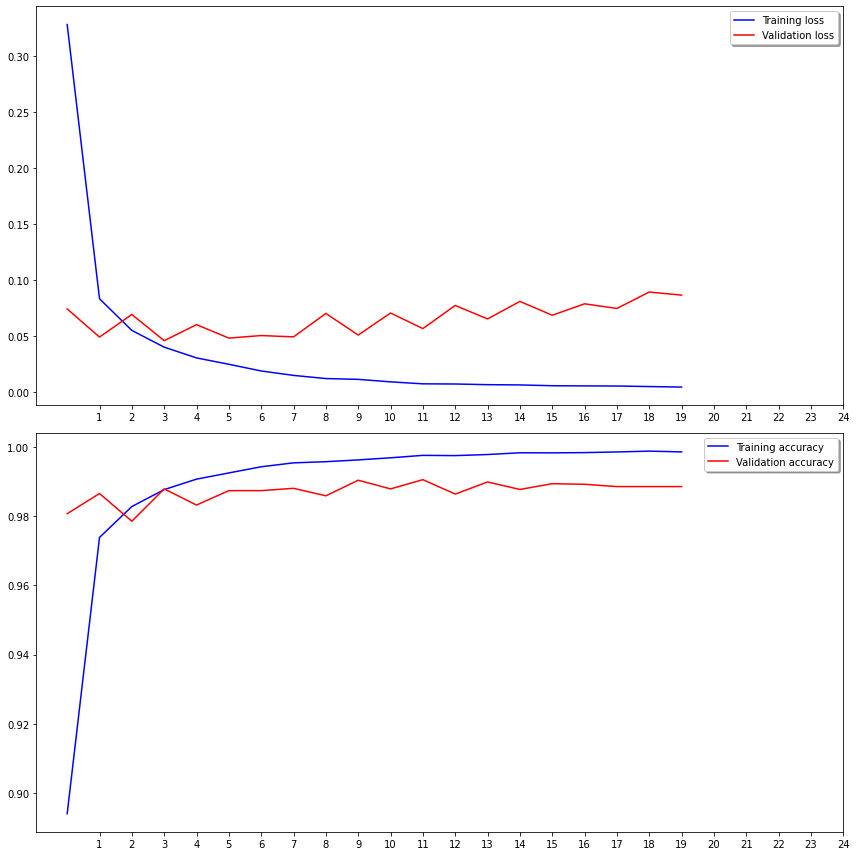

In [39]:
# plot data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation loss")
ax1.set_xticks(np.arange(1, 25, 1))
ax1.legend(loc='best', shadow=True)

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 25, 1))
ax2.legend(loc='best', shadow=True)

plt.tight_layout()
plt.show()